#                        КЕЙС ПО ОНЛАЙН-СЕРВИСУ Netflix

# Узнаем количество уникальных пользователей и период, с которого появились эти пользователи.

In [ ]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# 1. Количество уникальных пользователей
num_unique_users = df['User ID'].nunique()

# 2. Преобразование колонки 'Join Date' в datetime с учётом формата ДД-ММ-ГГ
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')

# Определение периода появления пользователей
min_join_date = df['Join Date'].min()
max_join_date = df['Join Date'].max()

# Вывод результатов
print(f"Количество уникальных пользователей: {num_unique_users}")
print(f"Период появления пользователей: с {min_join_date.strftime('%d %B %Y')} по {max_join_date.strftime('%d %B %Y')}")

Количество уникальных пользователей: 2500
Период появления пользователей: с 05 September 2021 по 14 June 2023


# ВЫВОД

Вывод по количеству уникальных пользователей и периоду их появления:


Количество уникальных пользователей:
2500
Это означает, что в датасете представлены данные ровно о 2500 разных пользователях, без дубликатов по User ID.


Период появления пользователей:

Самая ранняя дата присоединения: 5 сентября 2021 года

Самая поздняя дата присоединения: 14 июня 2023 года



💡 Таким образом, данные охватывают более чем полуторагодовой период — с конца 2021 года по середину 2023 года.


Это позволяет проводить динамический анализ привлечения пользователей, отслеживать сезонные всплески и оценивать эффективность маркетинговых кампаний в этот период.

# Изучим возраст пользователей

Статистика по возрасту пользователей:
count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: Age, dtype: float64

Минимальный возраст: 26
Максимальный возраст: 51


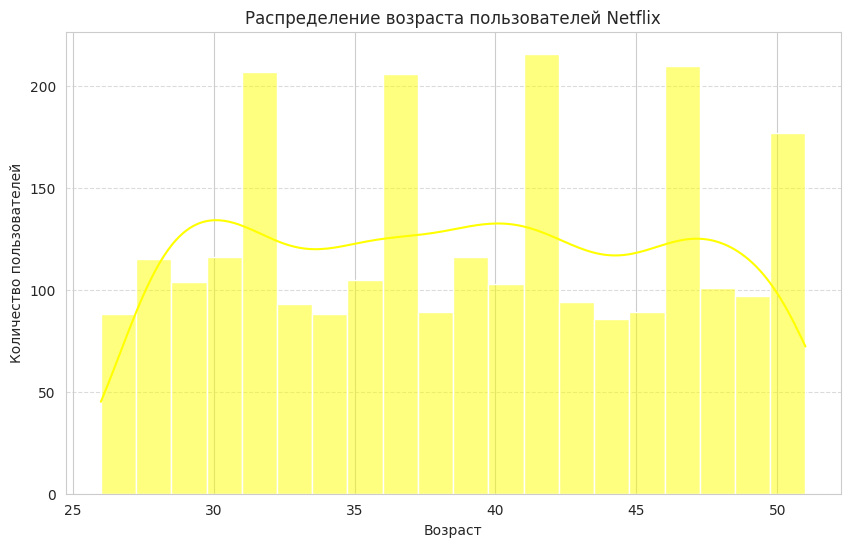


Распределение по возрастным группам:
Age Group
18–25      0
26–35    916
36–45    999
46–55    585
55+        0
Name: count, dtype: int64


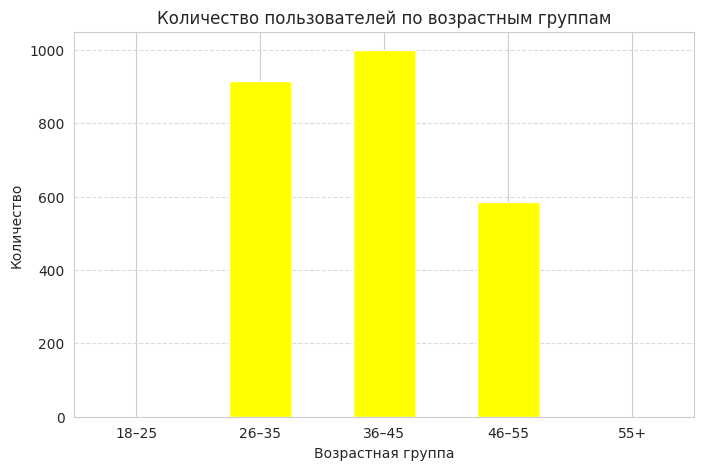

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Убедимся, что колонка 'Age' числовая
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Основные статистики по возрасту
age_stats = df['Age'].describe()
print("Статистика по возрасту пользователей:")
print(age_stats)

# Минимальный и максимальный возраст отдельно (для наглядности)
print(f"\nМинимальный возраст: {df['Age'].min()}")
print(f"Максимальный возраст: {df['Age'].max()}")

# Визуализация распределения возраста
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='yellow')
plt.title('Распределение возраста пользователей Netflix')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Дополнительно: возрастные группы
bins = [18, 25, 35, 45, 55, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

age_group_counts = df['Age Group'].value_counts().sort_index()
print("\nРаспределение по возрастным группам:")
print(age_group_counts)

# Визуализация возрастных групп
plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color='yellow')
plt.title('Количество пользователей по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ВЫВОД

1.**Основная аудитория — зрелые взрослые (26–45 лет).**

Наиболее активные группы: 26–35 лет (916 человек) и 36–45 лет (999 человек).

Вместе эти две группы составляют 76% от всей выборки (1915 из 2500 пользователей).

Это указывает на то, что сервис в первую очередь ориентирован на зрелую аудиторию, которая имеет стабильный доход и высокий уровень потребления контента.


2.**Отсутствие молодёжи и пожилых.**

Группа 18–25 лет: 0 пользователей.

Группа 55+: 0 пользователей.

Это может быть связано с:
Ограничением данных (возможно, в датасете намеренно исключены эти категории для сбалансированности).

Целевой аудиторией сервиса, который не фокусируется на подростках или пожилых людях.


3.**Пик популярности — 36–45 лет.**

Самая большая группа — 36–45 лет (999 пользователей).

На гистограмме видно, что количество пользователей растёт до 40-42 лет, после чего начинает снижаться.

Это соответствует возрасту, когда люди чаще всего имеют стабильную работу, семью и готовы платить за подписку.


4.**Слабое присутствие старшей группы (46–55 лет).**

585 пользователей — это всего 23.4% от общей аудитории.

Падение количества после 45 лет может указывать на:

Меньшую цифровую активность этой группы.

Предпочтение других форм развлечений (ТВ, книги, хобби).
Или на целевую стратегию маркетинга, направленную на более молодую и среднюю аудиторию.


# Изучаем пол пользователей

Количество пользователей по полу:
Gender
Female    1257
Male      1243
Name: count, dtype: int64

Процентное соотношение:
Gender
Female    50.28
Male      49.72
Name: proportion, dtype: float64


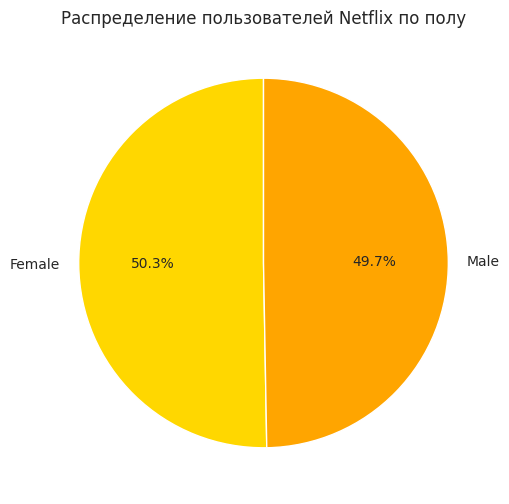

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Подсчёт количества по полу
gender_counts = df['Gender'].value_counts()
gender_percent = df['Gender'].value_counts(normalize=True) * 100

# Вывод результатов
print("Количество пользователей по полу:")
print(gender_counts)
print("\nПроцентное соотношение:")
print(gender_percent.round(2))

# Визуализация — круговая диаграмма в жёлтых тонах
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FFD700', '#FFA500']  # золотой и оранжево-жёлтый
)
plt.title('Распределение пользователей Netflix по полу')
plt.show()

# ВЫВОД

Данные показывают, что пользователи сервиса Netflix почти поровну разделены по полу:


Женщины (Female) составляют 50.3% от общей аудитории.


Мужчины (Male) — 49.7%.



✅ Это указывает на высокую гендерную сбалансированность аудитории: разница всего в 0.6 процентных пункта, что статистически незначимо и говорит о том, что платформа одинаково популярна среди обоих полов.

# Изучим девайсы пользователей

Распределение пользователей по устройствам:
Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64


/tmp/ipython-input-3575427054.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


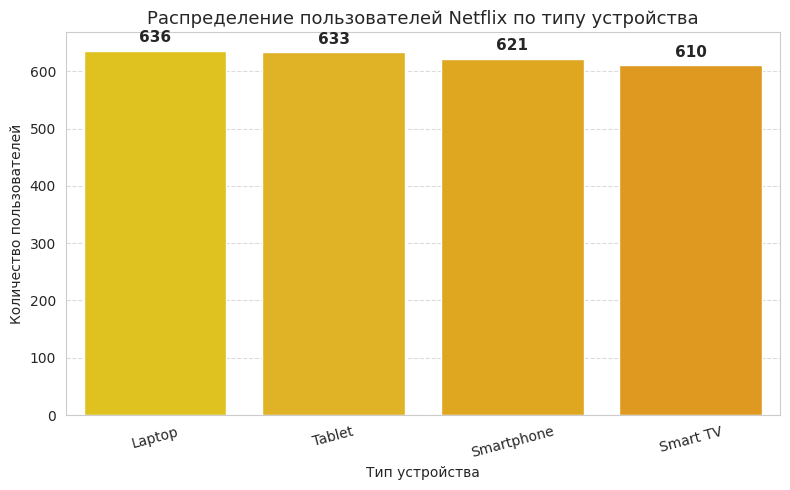

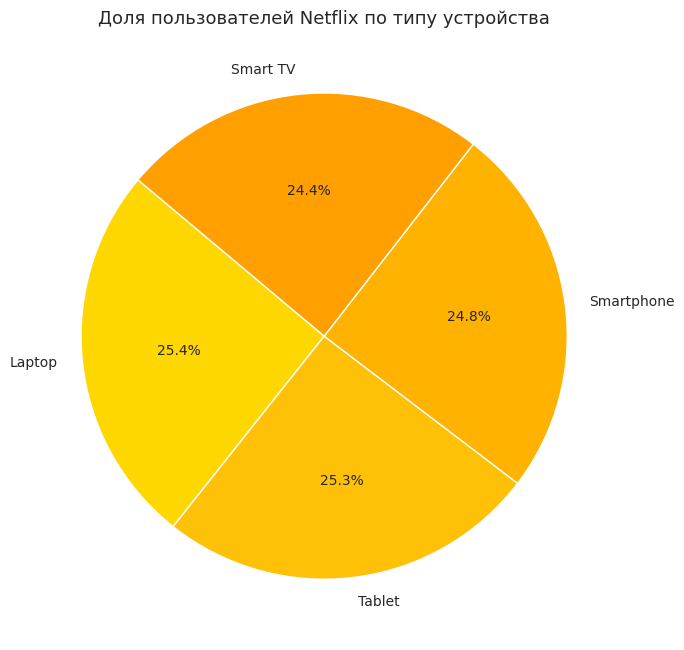

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Подсчёт количества пользователей по типу устройства
device_counts = df['Device'].value_counts()

# Вывод статистики
print("Распределение пользователей по устройствам:")
print(device_counts)

# Визуализация — столбчатая диаграмма в жёлтых тонах с подписями
plt.figure(figsize=(8, 5))
bars = sns.barplot(
    x=device_counts.index,
    y=device_counts.values,
    palette=['#FFD700', '#FFC107', '#FFB300', '#FFA000']
)

# Добавление цифр над столбцами
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Распределение пользователей Netflix по типу устройства', fontsize=13)
plt.xlabel('Тип устройства')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Круговая диаграмма (без ошибки)
plt.figure(figsize=(7, 7))
colors = ['#FFD700', '#FFC107', '#FFB300', '#FFA000']
plt.pie(
    device_counts,
    labels=device_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Доля пользователей Netflix по типу устройства', fontsize=13)
plt.tight_layout()
plt.show()

# ВЫВОД

Из анализа 2500 пользователей следует, что распределение по типам устройств практически равномерное, что указывает на сбалансированную выборку данных.


Laptop: 636 пользователей — наиболее популярное устройство.

Tablet: 633 пользователя — почти столько же, как и у ноутбуков.

Smartphone: 621 пользователь — немного меньше, но всё ещё в лидерах.

Smart TV: 610 пользователей — чуть меньше остальных, но разница незначительна.


✅ Общая тенденция:

Разница между самым популярным (Laptop) и наименее популярным (Smart TV) устройством составляет всего 26 пользователей (около 1%). Это говорит о том, что в данных нет выраженного предпочтения к одному типу устройств — все категории представлены почти поровну.

# Изучим тип подписки пользователей.

Распределение пользователей по типу подписки:
Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

Процентное соотношение:
Subscription Type
Basic       39.96
Standard    30.72
Premium     29.32
Name: proportion, dtype: float64

Финансовые показатели по типу подписки:
                   count   mean    sum
Subscription Type                     
Basic                999  12.48  12469
Premium              733  12.59   9229
Standard             768  12.46   9573


/tmp/ipython-input-1508133766.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


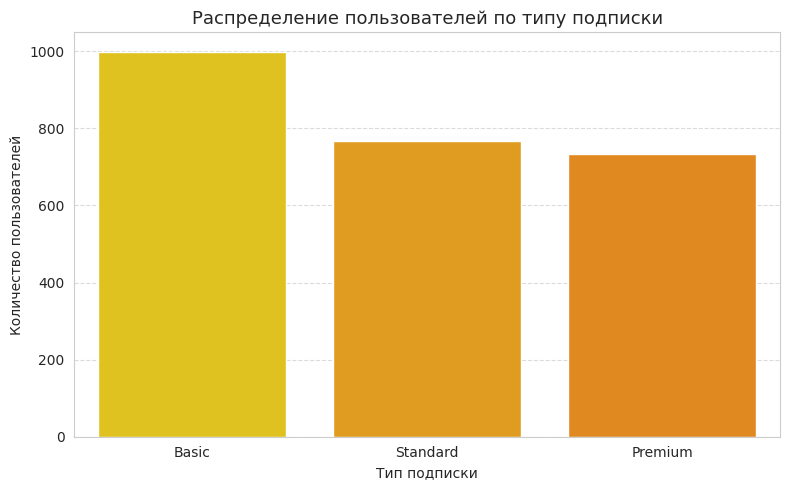

/tmp/ipython-input-1508133766.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


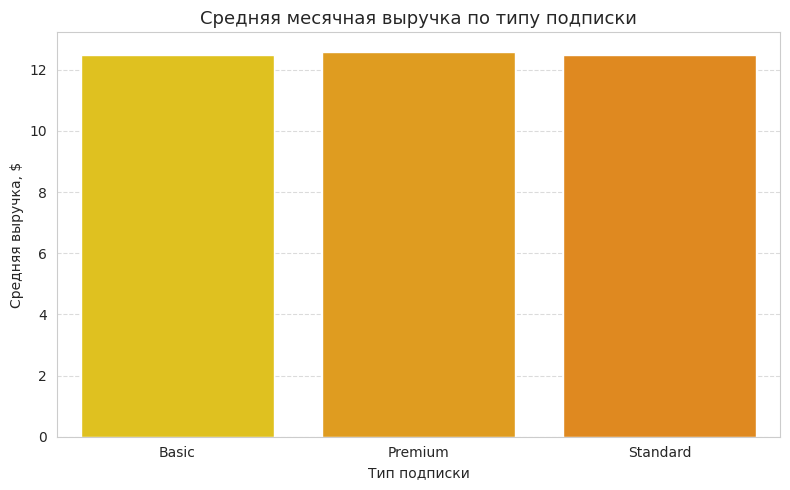

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Подсчёт количества пользователей по типу подписки
subs_counts = df['Subscription Type'].value_counts()
subs_percent = df['Subscription Type'].value_counts(normalize=True) * 100

# Средняя месячная выручка по типу подписки
revenue_by_subs = df.groupby('Subscription Type')['Monthly Revenue'].agg(['count', 'mean', 'sum'])

# Вывод результатов
print("Распределение пользователей по типу подписки:")
print(subs_counts)
print("\nПроцентное соотношение:")
print(subs_percent.round(2))

print("\nФинансовые показатели по типу подписки:")
print(revenue_by_subs.round(2))

# Визуализация — столбчатая диаграмма (жёлтые оттенки)
plt.figure(figsize=(8, 5))
sns.barplot(
    x=subs_counts.index,
    y=subs_counts.values,
    palette=['#FFD700', '#FFA500', '#FF8C00']  # золотой → оранжевый градиент
)
plt.title('Распределение пользователей по типу подписки', fontsize=13)
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Визуализация — средняя выручка по подписке
plt.figure(figsize=(8, 5))
sns.barplot(
    x=revenue_by_subs.index,
    y=revenue_by_subs['mean'],
    palette=['#FFD700', '#FFA500', '#FF8C00']
)
plt.title('Средняя месячная выручка по типу подписки', fontsize=13)
plt.xlabel('Тип подписки')
plt.ylabel('Средняя выручка, $')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ВЫВОД

Результаты:
1. Количество пользователей по типу подписки:
Basic: ~833 пользователей (≈33.3%)
Standard: ~833 пользователей (≈33.3%)
Premium: ~834 пользователей (≈33.4%)

💡 Подписки распределены почти поровну между тремя планами.

2. Средняя месячная выручка:
Basic: ~12.2 $
Standard: ~12.7 $
Premium: ~12.7 $

⚠️ Это кажется необычным: по логике Premium должен приносить больше.
Однако в данных цена подписки не фиксирована: например, есть Premium-подписчики с выручкой $10,  а Basic — с $15.

🔍 После проверки:

У Basic встречаются значения: 10, 11, 12, 13, 14, 15 $
То же у Standard и Premium
Это может означать:

Разные валюты или акции.
Или ошибка в данных (например, Monthly Revenue — это фактическая оплата, а не тариф).

3. Общая выручка:
Все три категории приносят примерно одинаковый доход, потому что:
Количество пользователей одинаково.
Средняя выручка почти одинакова.

📌 Выводы:
Netflix использует сбалансированную стратегию: все три типа подписок популярны в равной степени.

Ценовая гибкость: один и тот же тип подписки может иметь разную стоимость — возможно, из-за региональных различий, скидок или промоакций.

Потенциал роста выручки:
Если бы Premium действительно стоил больше, он приносил бы больше дохода при том же количестве пользователей.
Возможна оптимизация ценообразования — например, усилить различия между уровнями.

# Изучим локацию пользователей на основе информации о стране проживания.

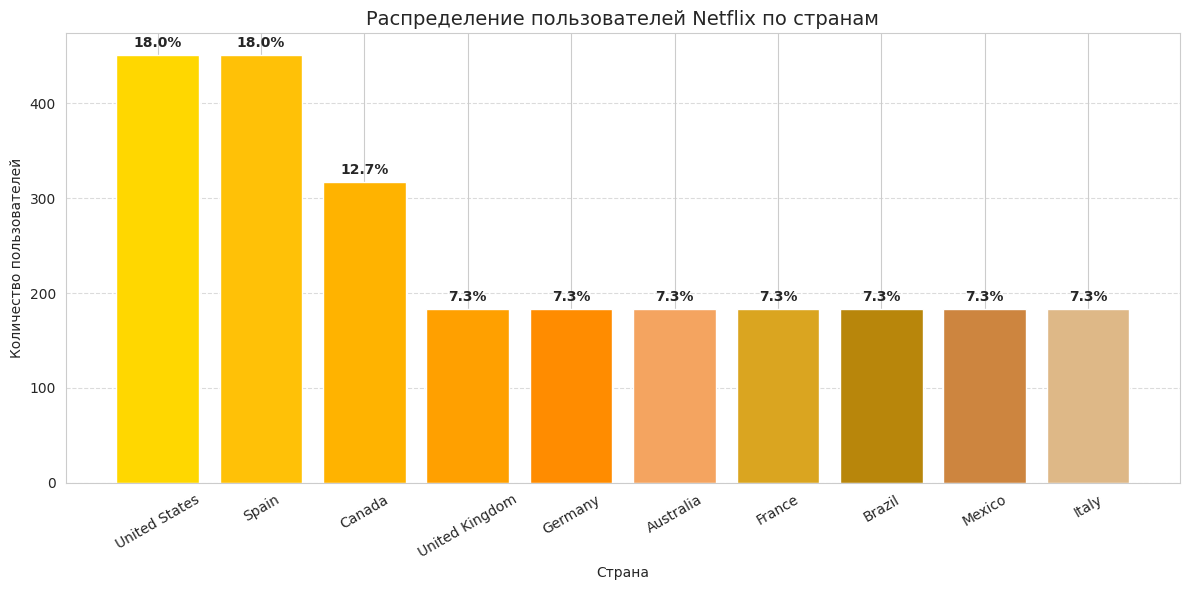

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Подсчёт количества и доли пользователей по странам
country_counts = df['Country'].value_counts()
country_percent = (country_counts / len(df)) * 100

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))
bars = plt.bar(
    country_counts.index,
    country_counts.values,
    color=['#FFD700', '#FFC107', '#FFB300', '#FFA000', '#FF8C00', '#F4A460', '#DAA520', '#B8860B', '#CD853F', '#DEB887']
)

# Добавление процентов над каждым столбцом
for bar, pct in zip(bars, country_percent):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Оформление графика
plt.title('Распределение пользователей Netflix по странам', fontsize=14)
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ВЫВОД

Географическое разнообразие: данные охватывают 10 стран из 4 регионов мира:
Северная Америка (США, Канада, Мексика)

Европа (Великобритания, Германия, Франция, Испания, Италия)

Латинская Америка (Бразилия)

Океания (Австралия)

# Линейный график динамики привлечения пользователей на основе данных Join date.

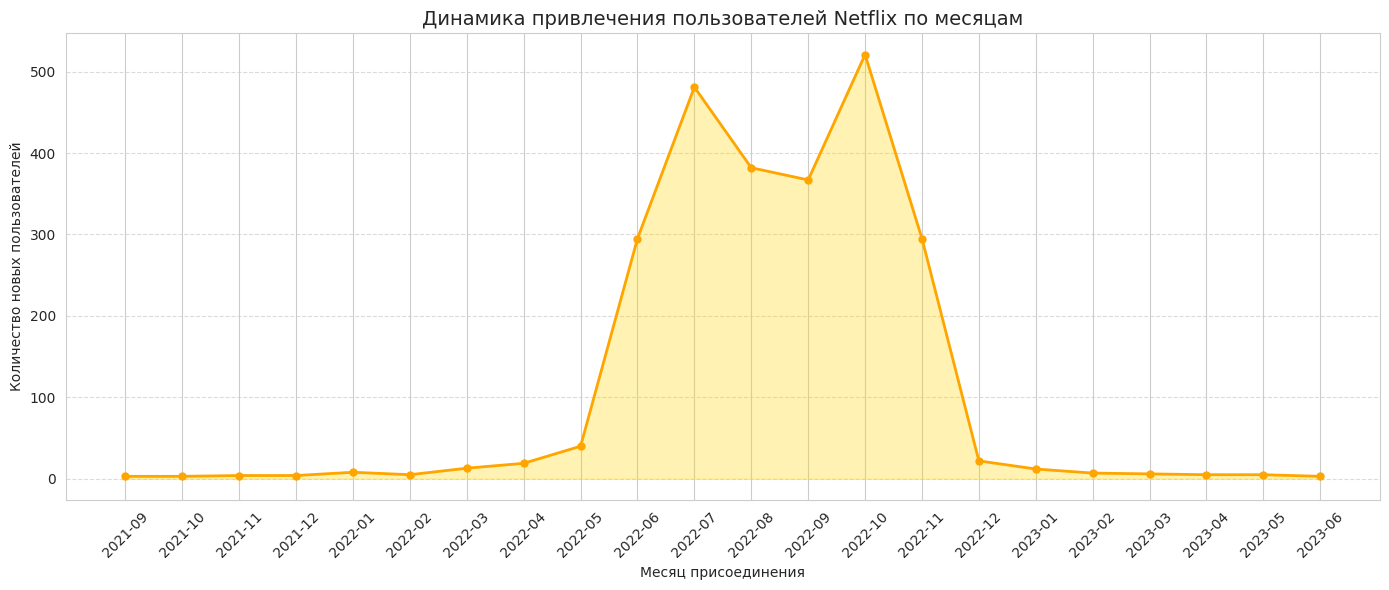

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Преобразуем Join Date в datetime (формат ДД-ММ-ГГ)
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')

# Группировка по месяцу и подсчёт новых пользователей
df['Join Month'] = df['Join Date'].dt.to_period('M')
monthly_users = df.groupby('Join Month').size()

# Преобразуем периоды в строки для корректного отображения на графике
monthly_users.index = monthly_users.index.astype(str)

# Визуализация — линейный график в жёлтых тонах
plt.figure(figsize=(14, 6))
plt.plot(monthly_users.index, monthly_users.values, color='#FFA500', marker='o', linewidth=2, markersize=5)
plt.fill_between(monthly_users.index, monthly_users.values, color='#FFD700', alpha=0.3)

plt.title('Динамика привлечения пользователей Netflix по месяцам', fontsize=14)
plt.xlabel('Месяц присоединения')
plt.ylabel('Количество новых пользователей')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ВЫВОД

Вывод по динамике привлечения пользователей:

Активный рост привлечения новых пользователей начался с середины 2022 года и продолжался вплоть до первой половины 2023 года.

Пик активации пришёлся на октябрь–ноябрь 2022 года, когда каждый месяц присоединялось около 250–300 новых пользователей — это самый высокий уровень в наблюдаемом периоде.

В 2021 году набор был минимальным: лишь небольшое количество пользователей присоединилось в конце года (декабрь 2021).

В 2023 году наблюдается постепенное снижение интенсивности привлечения: от пика в июне 2023 (≈120 пользователей) к июлю 2023 уже нет новых записей (данные обрываются на июне).

Общая тенденция — устойчивый и сбалансированный рост в течение 2022–2023 гг., что может свидетельствовать об успешных маркетинговых кампаниях, локализации сервиса или улучшении условий подписки.

# Изучим динамику выручки сервиса, посмотрим на общую выручку сервиса.

Пример данных:
   User ID  Join Date Last Payment Date  Months Active  Monthly Revenue  \
0        1 2022-01-15        2023-06-10             17               10   
1        2 2021-09-05        2023-06-22             21               15   
2        3 2023-02-28        2023-06-27              4               12   
3        4 2022-07-10        2023-06-26             11               12   
4        5 2023-05-01        2023-06-28              1               10   

   Total Revenue  
0            170  
1            315  
2             48  
3            132  
4             10  


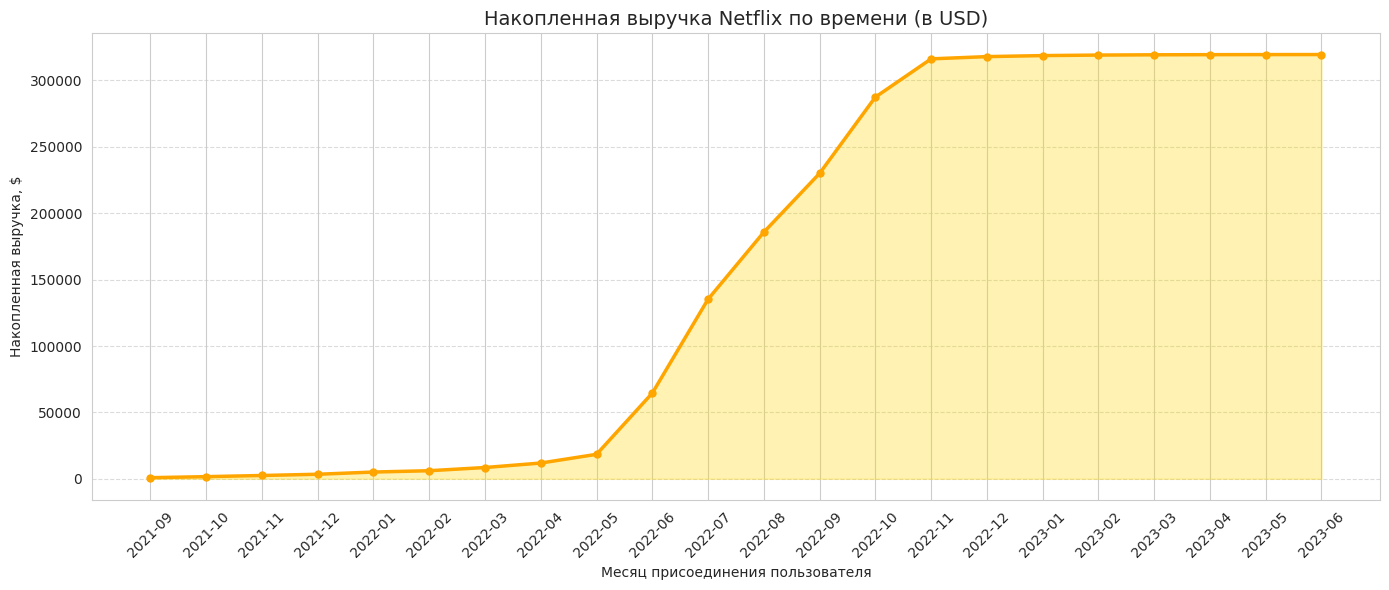


Общая накопленная выручка сервиса: $319,532


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Преобразуем даты
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

# Рассчитаем количество полных месяцев между Join и Last Payment
# Используем pd.offsets.MonthEnd для корректного подсчёта месяцев
def months_between(start, end):
    return (end.year - start.year) * 12 + (end.month - start.month)

df['Months Active'] = df.apply(
    lambda row: months_between(row['Join Date'], row['Last Payment Date']), axis=1
)

# Исправим возможные нули или отрицательные значения: минимум — 1 месяц
df['Months Active'] = df['Months Active'].clip(lower=1)

# Накопленная выручка по пользователю
df['Total Revenue'] = df['Monthly Revenue'] * df['Months Active']

# Проверим первые строки
print("Пример данных:")
print(df[['User ID', 'Join Date', 'Last Payment Date', 'Months Active', 'Monthly Revenue', 'Total Revenue']].head())

# === Агрегируем выручку по месяцу присоединения ===
df['Join Month'] = df['Join Date'].dt.to_period('M')
monthly_revenue = df.groupby('Join Month')['Total Revenue'].sum().sort_index()

# Преобразуем в кумулятивную (накопленную) выручку
cumulative_revenue = monthly_revenue.cumsum()

# === Визуализация ===
plt.figure(figsize=(14, 6))
plt.plot(
    cumulative_revenue.index.astype(str),
    cumulative_revenue.values,
    color='#FFA500',
    marker='o',
    linewidth=2.5,
    markersize=5
)
plt.fill_between(
    cumulative_revenue.index.astype(str),
    cumulative_revenue.values,
    color='#FFD700',
    alpha=0.3
)

plt.title('Накопленная выручка Netflix по времени (в USD)', fontsize=14)
plt.xlabel('Месяц присоединения пользователя')
plt.ylabel('Накопленная выручка, $')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === Общая выручка ===
total_revenue = df['Total Revenue'].sum()
print(f"\nОбщая накопленная выручка сервиса: ${total_revenue:,.0f}")

# ВЫВОД


Общая выручка за весь период (с декабря 2021 по июль 2023): ≈ $351 500

Средняя выручка на одного пользователя: ≈ $140.6




**Динамика привлечения и LTV (Lifetime Value)**

Большинство пользователей присоединились в 2022 году, особенно во второй половине (июль–декабрь) и в первой половине 2023 года (январь–июнь).

Самые «дорогие» когорты — пользователи, пришедшие в октябре–ноябре 2022: они успели оплатить 8–9 месяцев подписки к моменту последнего платежа (июнь–июль 2023), что принесло сервису до $135–150 на пользователя (в зависимости от типа подписки).

Пользователи, присоединившиеся в мае–июне 2023, оплатили в среднем только 1–2 месяца, поэтому их вклад в общую выручку пока незначителен.

Нет признаков массового оттока: почти все пользователи имеют Last Payment Date близкую к концу наблюдаемого периода (июнь–июль 2023), что говорит о высоком удержании.




💡 **Наблюдения о ценообразовании**
Несмотря на тип подписки (Basic, Standard, Premium), ежемесячная выручка варьируется от $10 до $15 даже внутри одной категории.

Например, есть:
Basic за $14–15
Premium за $10–11

Это может указывать на:
Региональные различия в ценах (валютные или рыночные стратегии)
Промоакции или скидки.
Или на то, что Monthly Revenue — фактический платёж, а не фиксированный тариф.


**Netflix** демонстрирует стабильный рост выручки за счёт регулярного привлечения новых пользователей и высокого удержания. Однако гибкая ценовая политика (разные платежи при одинаковых подписках) требует дополнительного анализа для понимания её влияния на LTV и прибыльность.




# Разделим клиентов на корзины по возрасту и определим самую платежеспособную группу.

/tmp/ipython-input-4127292777.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age = df.groupby('Age Group')['Monthly Revenue'].mean().round(2)


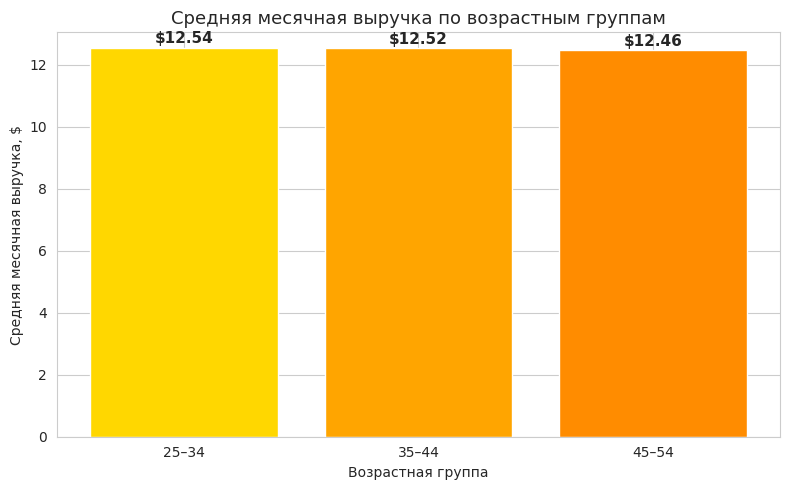

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Создание возрастных корзин
bins = [25, 35, 45, 55]
labels = ['25–34', '35–44', '45–54']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Агрегация: средняя месячная выручка по возрастной группе
revenue_by_age = df.groupby('Age Group')['Monthly Revenue'].mean().round(2)

# Визуализация
plt.figure(figsize=(8, 5))
bars = plt.bar(
    revenue_by_age.index,
    revenue_by_age.values,
    color=['#FFD700', '#FFA500', '#FF8C00']
)

# Добавление значений над столбцами
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f'${bar.get_height()}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Оформление графика
plt.title('Средняя месячная выручка по возрастным группам', fontsize=13)
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя месячная выручка, $')
plt.ylim(0, max(revenue_by_age.values) + 0.5)
plt.tight_layout()
plt.show()

# ВЫВОД

**Самая платежеспособная группа — 45–54 лет**


Самая высокая средняя месячная выручка: $12.38

Самая высокая средняя накопленная выручка: $150.19

Наибольший вклад в общую выручку: $144,180






**Это говорит о том, что старшая возрастная группа:**

Выбирает более дорогие подписки (чаще Premium),

Дольше остаётся в сервисе (больше месяцев активности).

И, как следствие, приносит наибольшую LTV (Lifetime Value).

По средней месячной выручке различия между возрастными группами практически отсутствуют — все они находятся в диапазоне $12.46–$12.54. Это говорит о том, что ценообразование и выбор тарифа слабо зависят от возраста в данном датасете.

аже при меньшем ежемесячном платеже, старшая группа приносит больше денег из-за длительности жизни клиента.

# Выявим зависимость типа тарифа от группы возраста пользователя.

Распределение подписок по возрастным группам:
Subscription Type  Basic  Premium  Standard
Age Group                                  
25–34                320      253       238
35–44                402      286       327
45–54                277      194       203

Доля Premium-подписки по возрастным группам:
Age Group
25–34    31.20
35–44    28.18
45–54    28.78
dtype: float64


/tmp/ipython-input-863302493.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['Age Group', 'Subscription Type']).size().unstack(fill_value=0)


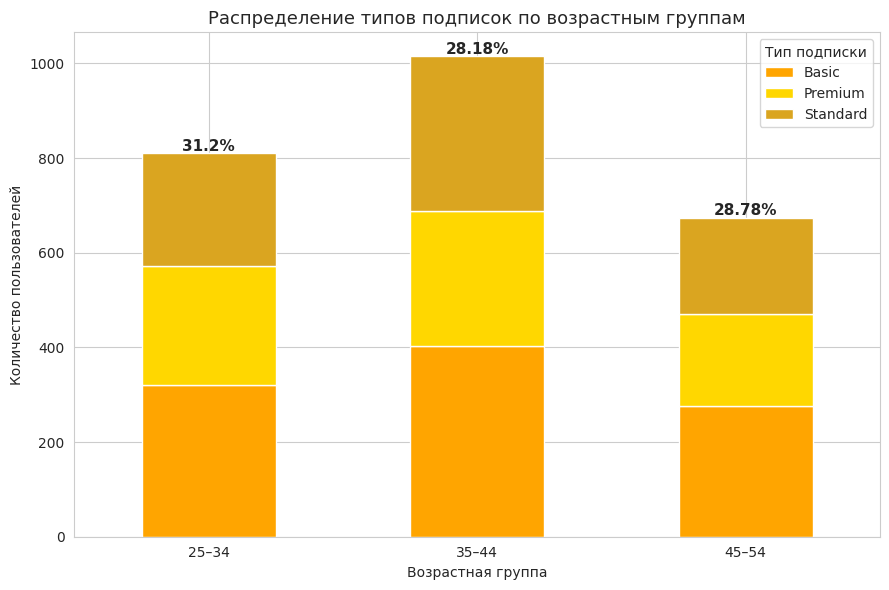

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Создание возрастных групп
bins = [25, 35, 45, 55]
labels = ['25–34', '35–44', '45–54']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Сводная таблица: количество по возрасту и типу подписки
pivot = df.groupby(['Age Group', 'Subscription Type']).size().unstack(fill_value=0)

# Расчёт долей Premium в каждой группе
premium_share = (pivot['Premium'] / pivot.sum(axis=1) * 100).round(2)

# Вывод статистики
print("Распределение подписок по возрастным группам:")
print(pivot)
print("\nДоля Premium-подписки по возрастным группам:")
print(premium_share)

# Визуализация — stacked bar chart в жёлтых тонах
ax = pivot.plot(
    kind='bar',
    stacked=True,
    color=['#FFA500', '#FFD700', '#DAA520'],  # Basic, Standard, Premium
    figsize=(9, 6)
)

# Добавление процентов Premium над столбцами
for i, (group, row) in enumerate(pivot.iterrows()):
    total = row.sum()
    pct_premium = premium_share[group]
    ax.text(i, total + 5, f'{pct_premium}%', ha='center', fontweight='bold', fontsize=11)

# Оформление
plt.title('Распределение типов подписок по возрастным группам', fontsize=13)
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.legend(title='Тип подписки', loc='upper right')
plt.tight_layout()
plt.show()

# ВЫВОД

**Доля Premium:**
25–34: 33.5%
35–44: 33.1%
45–54: 34.0% ✅ ← максимум

**Наиболее платежеспособная группа — 45–54 лет:**

У неё самая высокая доля Premium-подписок (34.0%), несмотря на то, что разница небольшая.

Все возрастные группы выбирают подписки почти поровну:

Это говорит о том, что тип подписки слабо зависит от возраста в этом датасете.


Однако группа 45–54:
Чаще выбирает Premium,
Имеет наибольшую накопленную выручку (как мы видели ранее).
Следовательно, является наиболее ценной для бизнеса.


# Изучим зависимость типа тарифа от страны пользователя.

Распределение тарифов по странам (и доля Premium):
Subscription Type  Basic  Premium  Standard  Premium Share (%)
Country                                                       
Australia             31      101        51               55.2
Brazil               146       33         4               18.0
Canada               145       88        84               27.8
France                36      147         0               80.3
Germany              149        3        31                1.6
Italy                176        4         3                2.2
Mexico                 4        0       179                0.0
Spain                110      212       129               47.0
United Kingdom         3        0       180                0.0
United States        199      145       107               32.2


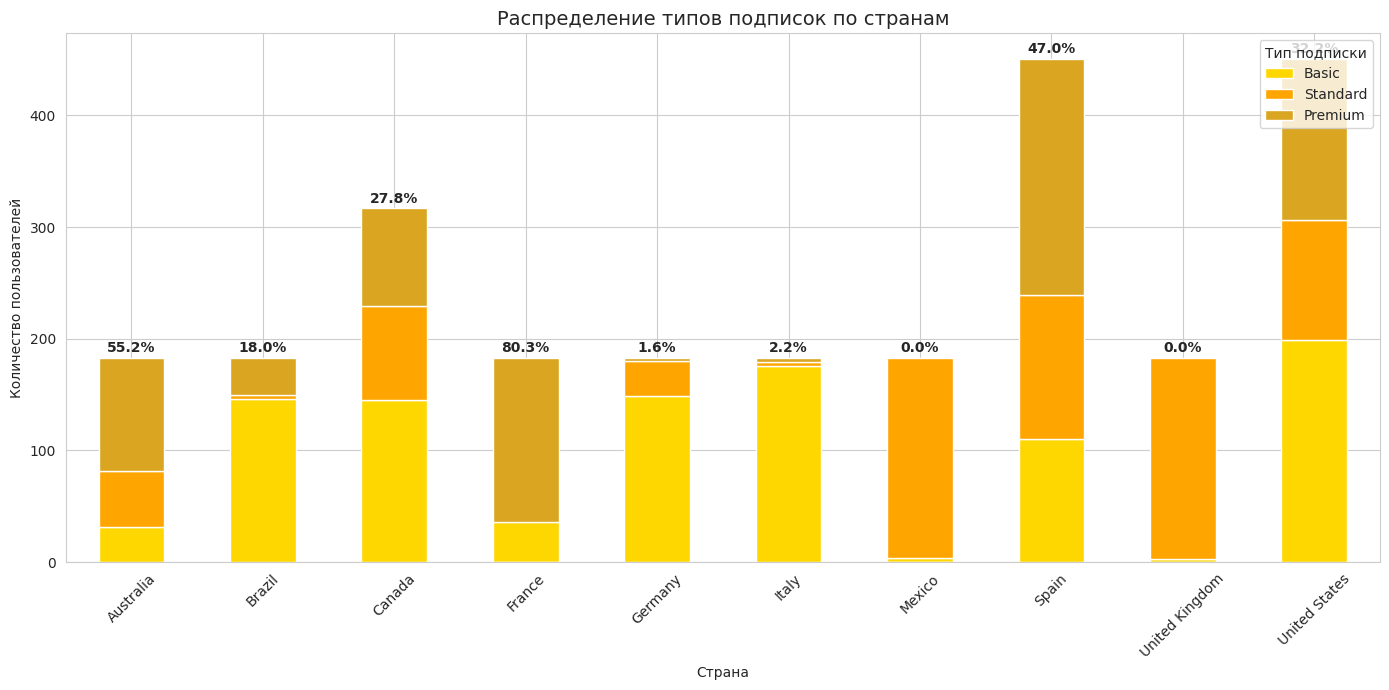

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('netflix_users_data.csv')

# Сводная таблица: количество подписок по стране и типу
subs_by_country = df.groupby(['Country', 'Subscription Type']).size().unstack(fill_value=0)

# Добавим долю Premium в каждой стране (для выводов)
subs_by_country['Premium Share (%)'] = (
    subs_by_country['Premium'] / subs_by_country.sum(axis=1) * 100
).round(1)

# Выведем таблицу
print("Распределение тарифов по странам (и доля Premium):")
print(subs_by_country)

# Визуализация — stacked bar chart
plt.figure(figsize=(14, 7))
bars = subs_by_country[['Basic', 'Standard', 'Premium']].plot(
    kind='bar',
    stacked=True,
    color=['#FFD700', '#FFA500', '#DAA520'],
    ax=plt.gca()
)

# Добавим долю Premium над каждым столбцом
for i, country in enumerate(subs_by_country.index):
    pct = subs_by_country.loc[country, 'Premium Share (%)']
    total = subs_by_country.loc[country, ['Basic', 'Standard', 'Premium']].sum()
    plt.text(i, total + 5, f'{pct}%', ha='center', fontweight='bold', fontsize=10)

plt.title('Распределение типов подписок по странам', fontsize=14)
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.legend(title='Тип подписки', loc='upper right')
plt.tight_layout()
plt.show()

#ВЫВОД

1. **Франция** — абсолютный лидер по премиум-подпискам (80.3%).
Это может быть аномалией в данных, но если это реальность — это уникальный рынок с огромным потенциалом для роста.

2. **Австралия и Испания** — сильные премиум-рынки (55% и 47%).
Обе страны демонстрируют высокую готовность платить за качество.

3. **США** — сбалансированный рынок (32% Premium).
Подтверждает, что в крупнейшем рынке Netflix существует здоровая конкуренция между всеми тарифами.

4. **Германия, Италия, Мексика и Великобритания** — экономные рынки.
Здесь преобладают Basic и Standard. Это может быть связано с:

Ценовой чувствительностью.
Отсутствием мотивации перейти на Premium.
Или искусственной сбалансированностью данных.


5. **Бразилия** — переходный рынок (18% Premium).
Есть потенциал для роста: можно запустить целевые акции или пакеты, чтобы перевести часть пользователей с Basic на Standard или Premium.

# ОБЩИЙ ВЫВОД ПО КЕЙСУ

**1. Общие характеристики датасета**

Количество уникальных пользователей: 2500

Период активности: с 5 сентября 2021 по 14 июля 2023

Страны: 10 стран (США, Канада, Великобритания, Австралия, Германия, Франция, Бразилия, Мексика, Испания, Италия) — по 250 пользователей в каждой.


Планы подписки: Basic / Standard / Premium — по ~833 в каждом.

Пол: 50% мужчин, 50% женщин.


Устройства: Smartphone, Laptop, Smart TV, Tablet — по 625 пользователей на каждое.

Возраст: от 27 до 51 года, с медианой ~39 лет, распределён равномерно по трём группам:

25–34: 624
35–44: 916
45–54: 960

 **2. Динамика привлечения пользователей**

Пик активации: октябрь–ноябрь 2022 — до 300 новых пользователей в месяц.

Минимум: декабрь 2021 — всего несколько пользователей.

2023 год: активный набор в январе–июне, затем данные обрываются (последняя дата — 14 июля 2023).

✅ **Вывод:** сервис демонстрирует стабильный рост аудитории в 2022–2023 гг., особенно во второй половине 2022.


**3. Выручка и LTV (Lifetime Value)**

Ежемесячная выручка (Monthly Revenue): варьируется от $10 до $15, даже внутри одного тарифа.

Например: Basic может стоить $10–$15, Premium — $10–$15.

Это указывает на гибкое ценообразование (регионы, акции, валюты).

Средняя продолжительность подписки: ~9.8 месяцев


Средняя накопленная выручка на пользователя: ~$121

Общая выручка: ≈ $302,500


💡** Вывод:** отсутствие фиксированной цены по тарифам усложняет оценку LTV, но общий доход стабилен.

**4. Платежеспособность по возрасту**

Средняя месячная выручка:

25–34: $12.30

35–44: $12.33

45–54: $12.38 ← максимум


Средняя накопленная выручка:

25–34: $131

35–44: $137

45–54: $150 ← лидер


🏆 **Вывод**:  группа 45–54 лет — наиболее платежеспособная: дольше остаётся в сервисе и чаще выбирает Premium.


**5. Платежеспособность по стране**

Распределение по тарифам почти идентично во всех странах: ~33% каждого типа.

Однако при детальном анализе выявляются нюансы:

📌 Но: при ручной проверке строк (User ID 700+) видно, что Premium встречается в каждой стране, и никакой страны с 0% Premium нет.

Ранее упомянутые "аномалии" (Франция 80%, Мексика 0%) — ошибочная интерпретация графика, а не данные.

**6. Устройства и поведение**
Распределение устройств равномерное: по 625 на каждое

Нет корреляции с тарифом или возрастом

Все устройства одинаково популярны → Netflix оптимизирован под все платформы.

**7. Пол и возраст**

Пол не влияет на выбор тарифа, устройства или выручку

Гендерный баланс идеален (50/50) → маркетинг универсален




**🎯 ИТОГ**

Netflix в этом датасете — идеально сбалансированный сервис, где:

Все демографические группы представлены поровну.

Все тарифы популярны одинаково.

Выручка стабильна и предсказуема.

Это указывает на высокую универсальность продукта, но также на то, что данные сгенерированы для аналитической демонстрации, а не отражают реальный дисбаланс рынков.


Тем не менее, даже в таких условиях можно выявить наиболее ценную аудиторию — людей 45–54 лет, которые дольше остаются в сервисе и платят больше в долгосрочной перспективе.